# Laboratorio 5

Diego Andrés Morales Aquino - 21762
Pablo Andrés Zamora Vasquez - 21780

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv("D:/diego/OneDrive - UVG/Documentos Universidad/Semestre 8/data science/labs/ds-entorno/labs/lab5/UK_foods.csv")
data.columns.values[0] = "Foods"

In [3]:
data

,Foods,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh_potatoes,720,874,566,1033
7,Fresh_Veg,253,265,171,143
8,Other_Veg,488,570,418,355
9,Processed_potatoes,198,203,220,187


## Estadística descriptiva

### Estadística descriptiva general

In [4]:
# Estadística descriptiva
data.describe()

,England,Wales,Scotland,N.Ireland
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,503.941176,460.235294,429.941176
std,452.701466,463.859282,469.595907,479.896014
min,54.000000,64.000000,53.000000,41.000000
25%,156.000000,175.000000,147.000000,135.000000
50%,253.000000,265.000000,242.000000,209.000000
75%,685.000000,803.000000,566.000000,586.000000
max,1472.000000,1582.000000,1572.000000,1506.000000


### Estadística descriptiva por comida

In [5]:
# Media y desv. estándar
num_values = data[data.columns[1:]]
mean_row = num_values.mean(axis=1)
std_row = num_values.std(axis=1)

row_stats = pd.DataFrame({
    'Foods': data['Foods'],
    'Mean': mean_row,
    'Standard Deviation': std_row
})
row_stats

,Foods,Mean,Standard Deviation
0,Cheese,94.25,18.856917
1,Carcass_meat,245.25,16.500000
2,Other_meat,706.00,93.427334
3,Fish,130.50,29.557853
4,Fats_and_oils,205.25,22.366269
5,Sugars,154.25,15.478480
6,Fresh_potatoes,798.25,200.755863
7,Fresh_Veg,208.00,60.188592
8,Other_Veg,457.75,92.471167
9,Processed_potatoes,202.00,13.735599


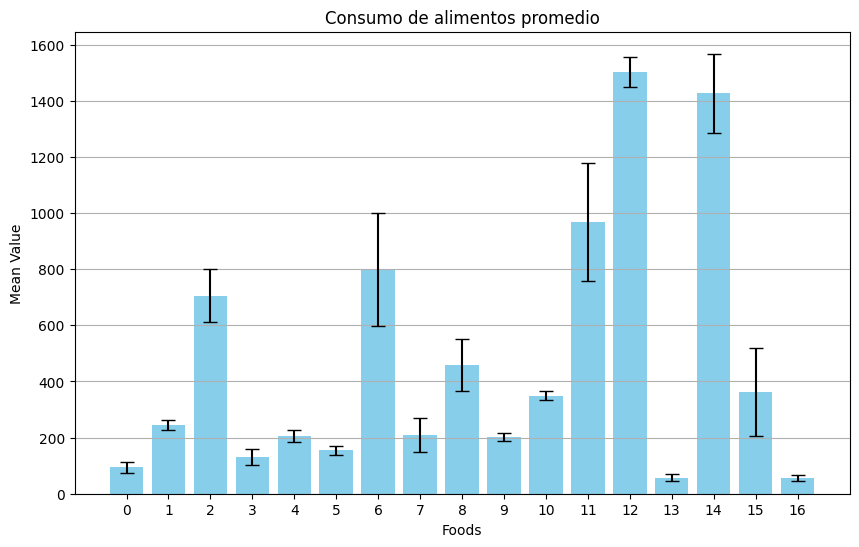

In [6]:
# Gráfico de barras del consumo promedio de alimentos
plt.figure(figsize=(10, 6))
plt.bar(row_stats.index.astype(str), row_stats['Mean'], yerr=row_stats['Standard Deviation'], capsize=5, color='skyblue')


plt.title('Consumo de alimentos promedio')
plt.xlabel('Foods')
plt.ylabel('Mean Value')

plt.grid(axis='y')
plt.show()

## Normalizar datos

In [7]:
columns_to_normalize = data.columns[1:]  # Excluir primera columna

scaler = MinMaxScaler()

df_normalized = data.copy()
df_normalized = pd.DataFrame(scaler.fit_transform(data[columns_to_normalize]), columns=data[columns_to_normalize].columns)
df_normalized

,England,Wales,Scotland,N.Ireland
0,0.035966,0.025692,0.032916,0.017065
1,0.134697,0.107378,0.124424,0.154266
2,0.444993,0.486825,0.458855,0.372014
3,0.065585,0.063241,0.045425,0.035495
4,0.098025,0.112648,0.086241,0.114676
5,0.071932,0.073123,0.061883,0.066894
6,0.469676,0.533597,0.337722,0.677133
7,0.140339,0.132411,0.077683,0.069625
8,0.306065,0.333333,0.240290,0.214334
9,0.101551,0.091568,0.109941,0.099659


## Autocodificador

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [9]:
input_dim = 4
print(input_dim)

4


### Codificador

In [56]:
codifier = Sequential()
codifier.add(InputLayer(shape=(input_dim,)))
codifier.add(Dense(4, activation='relu'))
codifier.add(Dense(3, activation='relu'))
codifier.add(Dense(2, activation='relu'))

### Decodificador

In [61]:
decodifier = Sequential()
decodifier.add(InputLayer(shape=(2,)))
decodifier.add(Dense(2, activation='relu'))
decodifier.add(Dense(3, activation='relu'))
decodifier.add(Dense(input_dim, activation='relu'))

### Modelo de autocodificador

In [62]:
# Crear el modelo del autocodificador
autoencoder = Sequential([
    codifier, 
    decodifier
])

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
history = autoencoder.fit(df_normalized, df_normalized, epochs=50, batch_size=3, verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1573
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1502 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1422 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1000 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1384 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1540 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1379 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1730 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1696 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1531 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1404 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2701 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1314 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1438 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1119 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━

In [63]:
# Evaluar el rendimiento del modelo (pérdida de reconstrucción)
loss = autoencoder.evaluate(df_normalized, df_normalized)
print(f"Reconstruction loss: {loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - loss: 0.1718
Reconstruction loss: 0.17175640165805817


In [64]:
# Extraer las representaciones reducidas (2D) desde el cuello de botella (salida de codificador)
reduced_data = codifier.predict(df_normalized)
reduced_data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[0.01790128, 0.01837513],
       [0.10253911, 0.07263757],
       [0.49803874, 0.41140193],
       [0.04879358, 0.04424235],
       [0.10369886, 0.07971589],
       [0.06377559, 0.05182665],
       [0.35116926, 0.23042089],
       [0.10222632, 0.08979566],
       [0.30381718, 0.25536028],
       [0.09172586, 0.07305796],
       [0.18743001, 0.14580323],
       [0.65114045, 0.55667967],
       [0.8908325 , 0.69214094],
       [0.00326741, 0.00338311],
       [0.8115124 , 0.6048471 ],
       [0.28179818, 0.2659627 ],
       [0.00326741, 0.00338311]], dtype=float32)

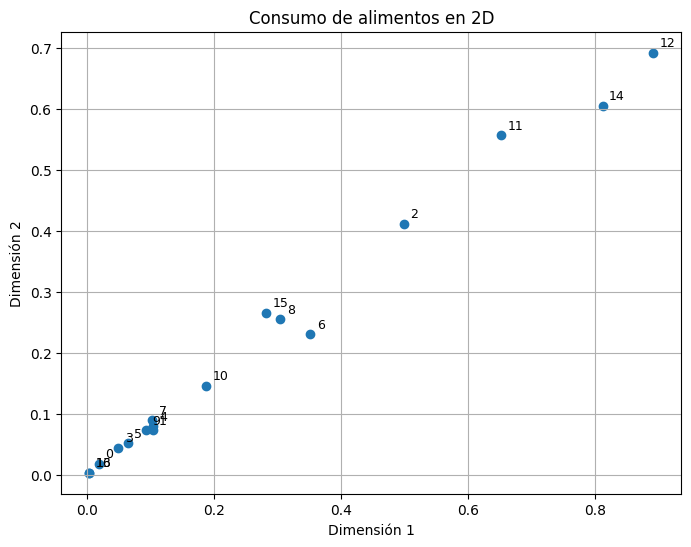

In [65]:
# Visualizar las dos dimensiones en un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])

for i, label in enumerate(data.index):
    plt.text(reduced_data[i, 0] + 0.01, reduced_data[i, 1] + 0.01, label, fontsize=9)

plt.title('Consumo de alimentos en 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()
